In [165]:
#import all neccessary libraries
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#displays all the columns
pd.set_option('display.max_columns', None)

In [166]:
#data= pd.read_csv("final.csv") #filled by closest location
data = pd.read_csv('final_fill_by_mean.csv')

In [167]:
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_N,WindGustDir_E,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_E,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes
0,31,2009-01-01,Albury,0.466981,0.591682,0.0,0.037761,0.524557,0.387597,0.146154,0.356322,0.46,0.26,0.396694,0.4176,0.494522,0.501599,0.567511,0.596929,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0,0
1,32,2009-01-02,Albury,0.426887,0.542533,0.0,0.037761,0.524557,0.271318,0.146154,0.126437,0.44,0.22,0.560331,0.5760,0.494522,0.501599,0.466245,0.527831,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0,0
2,33,2009-01-03,Albury,0.448113,0.635161,0.0,0.037761,0.524557,0.155039,0.084615,0.080460,0.43,0.22,0.631405,0.6032,0.494522,0.501599,0.512658,0.612284,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0,0
3,34,2009-01-04,Albury,0.490566,0.744802,0.0,0.037761,0.524557,0.240310,0.046154,0.195402,0.41,0.12,0.571901,0.5312,0.494522,0.501599,0.588608,0.754319,1.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.5,0.0,0.0,1.5,0,0
4,35,2009-01-05,Albury,0.504717,0.767486,0.0,0.037761,0.524557,0.271318,0.046154,0.298851,0.41,0.09,0.530579,0.5136,0.494522,0.501599,0.624473,0.763916,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.5,0.0,0.0,1.5,0,0


In [168]:
data= data.drop(['Date'],axis=1)

In [169]:
data= data.drop('Unnamed: 0',axis=1)

In [170]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_N,WindGustDir_E,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_E,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes
0,Albury,0.466981,0.591682,0.0,0.037761,0.524557,0.387597,0.146154,0.356322,0.46,0.26,0.396694,0.4176,0.494522,0.501599,0.567511,0.596929,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0,0
1,Albury,0.426887,0.542533,0.0,0.037761,0.524557,0.271318,0.146154,0.126437,0.44,0.22,0.560331,0.5760,0.494522,0.501599,0.466245,0.527831,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0,0
2,Albury,0.448113,0.635161,0.0,0.037761,0.524557,0.155039,0.084615,0.080460,0.43,0.22,0.631405,0.6032,0.494522,0.501599,0.512658,0.612284,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0,0
3,Albury,0.490566,0.744802,0.0,0.037761,0.524557,0.240310,0.046154,0.195402,0.41,0.12,0.571901,0.5312,0.494522,0.501599,0.588608,0.754319,1.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.5,0.0,0.0,1.5,0,0
4,Albury,0.504717,0.767486,0.0,0.037761,0.524557,0.271318,0.046154,0.298851,0.41,0.09,0.530579,0.5136,0.494522,0.501599,0.624473,0.763916,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.5,0.0,0.0,1.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143124,Uluru,0.266509,0.533081,0.0,0.037761,0.524557,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.494522,0.501599,0.364979,0.533589,0.0,3.0,0.0,0.0,0.0,1.5,1.5,0.0,1.0,2.0,0.0,0.0,0,0
143125,Uluru,0.285377,0.568998,0.0,0.037761,0.524557,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.494522,0.501599,0.381857,0.573896,2.0,0.0,0.0,1.0,0.0,1.5,1.5,0.0,3.0,0.0,0.0,0.0,0,0
143126,Uluru,0.327830,0.599244,0.0,0.037761,0.524557,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.494522,0.501599,0.415612,0.604607,3.0,0.0,0.0,0.0,0.0,1.5,1.5,0.0,1.0,0.0,0.0,2.0,0,0
143127,Uluru,0.384434,0.601134,0.0,0.037761,0.524557,0.170543,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0.0,1.5,1.5,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0,0


## Tried clustering but with no benefit to the model

In [171]:
# fit data
# from sklearn.cluster import KMeans
# kmeansmodel = KMeans(n_clusters=4)
# data_kmeans= data_clustered.drop("Location",axis=1)
# kmeansmodel.fit(data_kmeans)

In [172]:
#Adding the cluster number to all the entries
#data_clustered["Cluster"]= kmeansmodel.labels_
#data_clustered.head()

## Model

In [173]:
features= [
    "MinTemp",
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "Sunshine",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Cloud9am",
    "Cloud3pm",
    "Temp9am",
    "Temp3pm",
    "WindGustDir_N",
    "WindGustDir_E",
    "WindGustDir_S",
    "WindGustDir_W",
    "WindDir9am_N",
    "WindDir9am_E",
    "WindDir9am_S",
    "WindDir9am_W",
    "WindDir3pm_N",
    "WindDir3pm_E",
    "WindDir3pm_S",
    "WindDir3pm_W",
    #"Cluster",
    "RainToday_Yes",
    ]
target= ["RainTomorrow_Yes"]

## Train-Test split by location

In [174]:
#first get all the locations in a list
location_list= [i for i in data_clustered["Location"].unique()]

### Training Set

In [175]:
data_training= pd.DataFrame()

for i in location_list:
    a=data[data['Location']==i]                      #Selecting data from one particular location
    sample= a.sample(frac= 0.8)                      #Selecting a random sample of 80% from it
    data_training= data_training.append(sample)      #Appending that data to the new frame

data_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114493 entries, 2001 to 142110
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          114493 non-null  object 
 1   MinTemp           114493 non-null  float64
 2   MaxTemp           114493 non-null  float64
 3   Rainfall          114493 non-null  float64
 4   Evaporation       114493 non-null  float64
 5   Sunshine          114493 non-null  float64
 6   WindGustSpeed     114493 non-null  float64
 7   WindSpeed9am      114493 non-null  float64
 8   WindSpeed3pm      114493 non-null  float64
 9   Humidity9am       114493 non-null  float64
 10  Humidity3pm       114493 non-null  float64
 11  Pressure9am       114493 non-null  float64
 12  Pressure3pm       114493 non-null  float64
 13  Cloud9am          114493 non-null  float64
 14  Cloud3pm          114493 non-null  float64
 15  Temp9am           114493 non-null  float64
 16  Temp3pm          

### Testing test

In [176]:
data_testing= data.copy() #first copy the original dataset 

X_merge = pd.merge(data, data_training, how='inner') #merges the two datasets of training and original

data_testing = data_testing.append(X_merge) # appends the merged dataset to the original to the data_testing
data_testing['Duplicated']= data_testing.duplicated(keep=False) #hence marks all the duplocated rows with a True

data_testing_final = data_testing[~data_testing['Duplicated']] #selects rows which are not duplicated
del data_testing_final['Duplicated']
  
data_testing_final.info() # data_testing= data_clustered - data_training

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28577 entries, 2 to 143113
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          28577 non-null  object 
 1   MinTemp           28577 non-null  float64
 2   MaxTemp           28577 non-null  float64
 3   Rainfall          28577 non-null  float64
 4   Evaporation       28577 non-null  float64
 5   Sunshine          28577 non-null  float64
 6   WindGustSpeed     28577 non-null  float64
 7   WindSpeed9am      28577 non-null  float64
 8   WindSpeed3pm      28577 non-null  float64
 9   Humidity9am       28577 non-null  float64
 10  Humidity3pm       28577 non-null  float64
 11  Pressure9am       28577 non-null  float64
 12  Pressure3pm       28577 non-null  float64
 13  Cloud9am          28577 non-null  float64
 14  Cloud3pm          28577 non-null  float64
 15  Temp9am           28577 non-null  float64
 16  Temp3pm           28577 non-null  float


## Approach-1: Train-Test split for the whole dataset 

In [177]:
Y = data[target]
X = data[features]

In [178]:
#using Train-test split for whole dataset

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state= 42 )


## Approach 2: Train-Test split for per location

In [179]:
#using train test split by location
X_train= data_training[features]
y_train= data_training[target]

X_val= data_testing_final[features]
y_val= data_testing_final[target]

## Model

In [180]:
eval_result = {}

fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'logloss', 
            "eval_set" : [(X_val,y_val)],
            'eval_names': ['valid'],
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto', # that's actually the default
           }

In [181]:
#hyperparameters for lightgbm
boosting_type ='gbdt' #gradient boosted decision tree
num_leaves= 31
max_depth=5
random_state=0
silent=True
n_jobs=4
n_estimators=3000
colsample_bytree=0.9
subsample=0.9
learning_rate=0.05

In [182]:
# train the model on 1000 epocs
model = lgb.LGBMClassifier(boosting_type = boosting_type,
                         num_leaves= num_leaves, max_depth=max_depth, 
                         random_state=random_state, 
                         silent=silent,  
                         n_jobs=n_jobs, 
                         n_estimators=n_estimators,
                         colsample_bytree=colsample_bytree,
                         subsample=subsample,
                         learning_rate=learning_rate,
                         )
model.fit(X_train, y_train.values.ravel(), **fit_params)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid's binary_logloss: 0.520319
Training until validation scores don't improve for 10 rounds
[2]	valid's binary_logloss: 0.506671
[3]	valid's binary_logloss: 0.494633
[4]	valid's binary_logloss: 0.484011
[5]	valid's binary_logloss: 0.474614
[6]	valid's binary_logloss: 0.466047
[7]	valid's binary_logloss: 0.458468
[8]	valid's binary_logloss: 0.451492
[9]	valid's binary_logloss: 0.445142
[10]	valid's binary_logloss: 0.439494
[11]	valid's binary_logloss: 0.434257
[12]	valid's binary_logloss: 0.429348
[13]	valid's binary_logloss: 0.424758
[14]	valid's binary_logloss: 0.42111
[15]	valid's binary_logloss: 0.417

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, max_depth=5,
               n_estimators=3000, n_jobs=4, random_state=0, subsample=0.9)

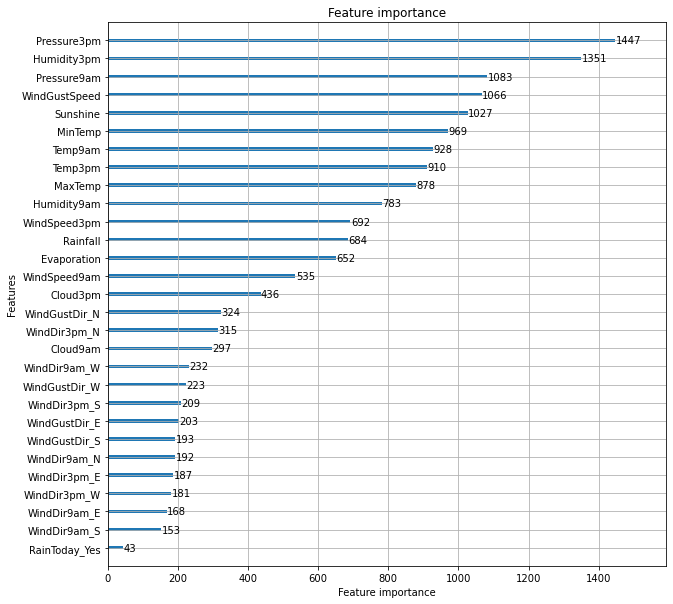

In [183]:
plt.rcParams['figure.figsize'] = (10, 10)
ax = lgb.plot_importance(model, max_num_features=-1)
plt.show()

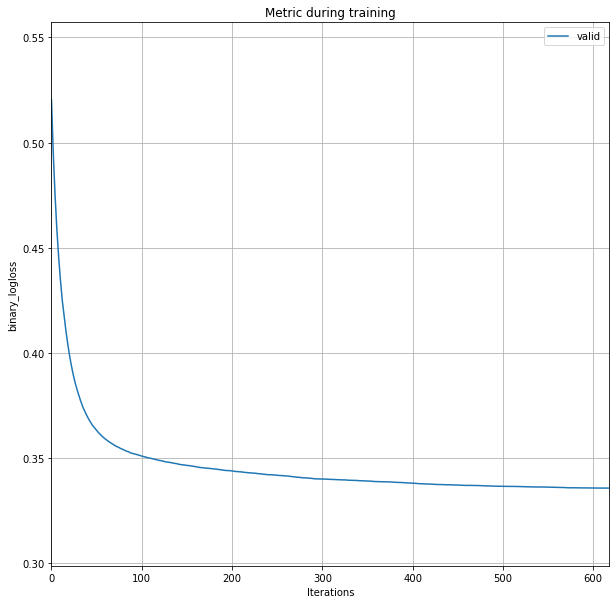

In [184]:
ax = lgb.plot_metric(model.evals_result_)
plt.show()

In [185]:
# prediction on the test dataset
y_pred = model.predict(X_val)
# use argmax() to get final prediction class 
print(y_pred[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1]


In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22207
           1       0.74      0.53      0.62      6370

    accuracy                           0.85     28577
   macro avg       0.81      0.74      0.76     28577
weighted avg       0.85      0.85      0.84     28577



In [107]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val,y_pred))

[[21093  1187]
 [ 2875  3471]]


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
predict_proba= model.predict_proba(X_val)
print("Area under the curve= ",roc_auc_score(y_val, predict_proba[:,1]))

Area under the curve=  0.8850159601225396


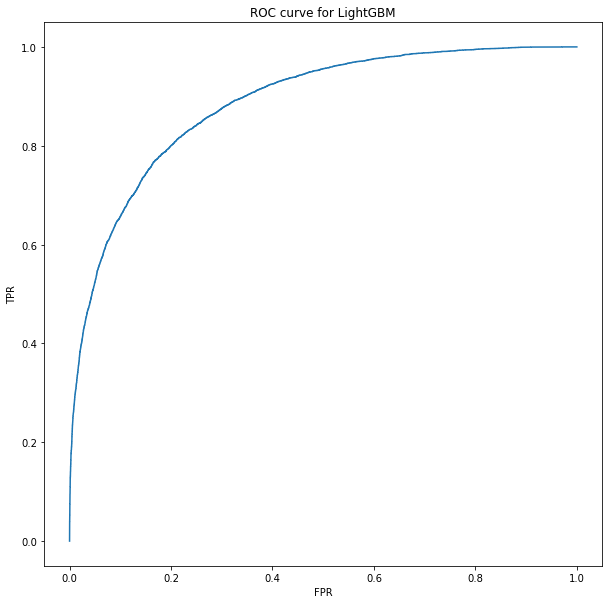

In [50]:
plt.rcParams['figure.figsize'] = (10, 5)
fpr, tpr, _ = roc_curve(y_val, predict_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for LightGBM')
plt.show()

## Hyperparameter Tuning

### According to docs of LightGBM the following guidelines were followed to tune the parameters:

1) num_leaves. This is the main parameter to control the complexity of the tree model. Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than 2^(max_depth). For example, when the max_depth=7 the depth-wise tree can get good accuracy, but setting num_leaves to 127 may cause over-fitting, and setting it to 70 or 80 may get better accuracy than depth-wise.

2) min_data_in_leaf. This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and num_leaves. Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

3) max_depth. You also can use max_depth to limit the tree depth explicitly.
